In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_csv('thermodynamics.csv')

In [5]:
data

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420
...,...,...,...,...,...,...,...,...,...
194,195,97.5,9192.93,297.812,1134.070,821.665,-2642.75,-1821.08,1.005550
195,196,98.0,9337.59,296.965,-1927.790,819.329,-2596.11,-1776.78,0.989970
196,197,98.5,9119.26,309.630,-1103.290,854.271,-2628.38,-1774.11,1.013670
197,198,99.0,9022.08,295.689,1359.530,815.807,-2629.19,-1813.38,1.024590


In [7]:
data.head()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420


In [9]:
data.tail()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
194,195,97.5,9192.93,297.812,1134.07,821.665,-2642.75,-1821.08,1.00555
195,196,98.0,9337.59,296.965,-1927.79,819.329,-2596.11,-1776.78,0.98997
196,197,98.5,9119.26,309.630,-1103.29,854.271,-2628.38,-1774.11,1.01367
197,198,99.0,9022.08,295.689,1359.53,815.807,-2629.19,-1813.38,1.02459
198,199,99.5,8865.98,300.846,2497.79,830.037,-2690.37,-1860.33,1.04263


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Step         199 non-null    int64  
 1   Time         199 non-null    float64
 2   Volume       199 non-null    float64
 3   Temperature  199 non-null    float64
 4   Pressure     199 non-null    float64
 5   Kinetic      199 non-null    float64
 6   Potential    199 non-null    float64
 7   Energy       199 non-null    float64
 8   Density      199 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.1 KB


In [13]:
data.describe()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,50.000000,9007.441307,298.888402,102.621241,824.634824,-2648.653166,-1824.018593,1.026478
std,57.590508,28.795254,133.275619,7.676824,1825.960539,21.180391,27.242203,32.394689,0.015152
min,1.000000,0.500000,8702.080000,275.620000,-4657.720000,760.436000,-2720.630000,-1912.660000,0.978717
25%,50.500000,25.250000,8920.410000,293.669500,-1146.185000,810.237000,-2670.345000,-1846.340000,1.014575
50%,100.000000,50.000000,9000.960000,299.139000,170.431000,825.327000,-2648.770000,-1824.730000,1.026990
75%,149.500000,74.750000,9111.105000,304.264000,1650.755000,839.465500,-2629.215000,-1800.455000,1.036270
max,199.000000,99.500000,9444.950000,322.245000,4959.470000,889.075000,-2589.970000,-1753.220000,1.062270


In [15]:
x=data[['Volume', 'Temperature', 'Pressure', 'Kinetic', 'Potential', 'Energy']]

In [17]:
y=data['Density']

In [19]:
x

,Volume,Temperature,Pressure,Kinetic,Potential,Energy
0,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56
1,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74
2,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62
3,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57
4,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97
...,...,...,...,...,...,...
194,9192.93,297.812,1134.070,821.665,-2642.75,-1821.08
195,9337.59,296.965,-1927.790,819.329,-2596.11,-1776.78
196,9119.26,309.630,-1103.290,854.271,-2628.38,-1774.11
197,9022.08,295.689,1359.530,815.807,-2629.19,-1813.38


In [27]:
y

0      1.005360
1      0.993652
2      1.014290
3      1.004950
4      1.012420
         ...   
194    1.005550
195    0.989970
196    1.013670
197    1.024590
198    1.042630
Name: Density, Length: 199, dtype: float64

In [101]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [103]:
x_train

,Volume,Temperature,Pressure,Kinetic,Potential,Energy
140,8836.50,294.906,-1772.500,813.647,-2673.51,-1859.86
31,8922.05,305.915,884.618,844.020,-2597.24,-1753.22
12,9015.66,309.490,-585.317,853.884,-2689.33,-1835.45
35,8998.95,286.597,440.927,790.722,-2672.34,-1881.62
115,9096.35,308.560,1171.110,851.318,-2669.74,-1818.42
...,...,...,...,...,...,...
106,8956.58,289.356,-1880.740,798.335,-2644.60,-1846.26
14,8962.54,300.846,1833.020,830.037,-2668.24,-1838.20
92,9032.93,297.103,-898.420,819.708,-2636.89,-1817.18
179,8805.39,282.011,3089.830,778.070,-2627.34,-1849.27


In [105]:
x_test

,Volume,Temperature,Pressure,Kinetic,Potential,Energy
82,9182.39,304.659,-580.2890,840.556,-2618.97,-1778.42
15,8855.54,299.274,648.6470,825.698,-2629.58,-1803.89
111,9008.04,292.667,1343.2000,807.469,-2639.25,-1831.78
177,8944.18,275.620,1346.2800,760.436,-2673.10,-1912.66
76,8829.90,322.245,2479.5700,889.075,-2670.51,-1781.43
163,8904.84,298.058,-591.3240,822.344,-2670.20,-1847.85
68,8949.36,297.300,2493.1100,820.252,-2610.83,-1790.58
67,8864.69,295.021,-900.3890,813.964,-2641.08,-1827.11
120,9078.85,292.410,-858.0390,806.760,-2630.36,-1823.60
173,9110.88,308.798,788.3570,851.976,-2630.88,-1778.90


In [107]:
y_train

140    1.04611
31     1.03608
12     1.02532
35     1.02722
115    1.01622
        ...   
106    1.03208
14     1.03140
92     1.02336
179    1.04980
102    1.01019
Name: Density, Length: 139, dtype: float64

In [109]:
y_test

82     1.006700
15     1.043860
111    1.026190
177    1.033510
76     1.046890
163    1.038080
68     1.032920
67     1.042780
120    1.018180
173    1.014600
176    1.014610
148    1.003110
65     1.021130
30     1.004910
86     1.034930
85     1.055290
55     1.007150
60     1.009120
90     1.023310
159    1.012180
16     1.005400
124    1.034870
96     1.053470
172    1.023080
66     1.029350
189    1.022530
147    1.034080
9      1.021950
18     1.012690
128    1.056900
190    1.034510
45     1.049630
192    1.014130
164    1.032590
101    1.026990
69     1.039190
126    1.011970
123    1.025030
75     1.028360
78     1.033100
183    1.022160
38     1.009710
24     1.027920
142    1.022330
141    1.040950
29     0.996281
19     1.023110
169    1.055230
127    1.023000
118    1.027440
56     1.049070
5      1.020130
122    1.009340
113    1.005010
93     1.038370
139    1.034780
95     1.033570
171    1.030740
196    1.013670
168    1.026530
Name: Density, dtype: float64

In [111]:
scaler=StandardScaler()

In [113]:
scaler

StandardScaler()

In [115]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [117]:
x_train_scaled

array([[-1.26062271e+00, -5.54987064e-01, -1.10294282e+00,
        -5.55005998e-01, -9.28513252e-01, -1.13498097e+00],
       [-6.29998999e-01,  8.64759218e-01,  3.77211920e-01,
         8.64699687e-01,  1.99039301e+00,  2.21479433e+00],
       [ 6.00382390e-02,  1.32579954e+00, -4.41619332e-01,
         1.32576632e+00, -1.53395572e+00, -3.68214134e-01],
       [-6.31379414e-02, -1.62653506e+00,  1.30052653e-01,
        -1.62657459e+00, -8.83736533e-01, -1.81850601e+00],
       [ 6.54836922e-01,  1.20586458e+00,  5.36803061e-01,
         1.20582543e+00, -7.84232714e-01,  1.66732165e-01],
       [-1.56653603e+00, -6.29140403e-01,  1.18757296e-01,
        -6.29139380e-01, -1.22855554e+00, -1.43119609e+00],
       [-1.21565714e+00, -6.96845626e-01, -1.62133049e+00,
        -6.96822317e-01, -1.46851282e+00, -1.67369670e+00],
       [-2.05334362e+00,  1.52556219e+00,  1.30704539e+00,
         1.52554317e+00, -3.21539956e-01,  7.61361257e-01],
       [-4.43871018e-01, -5.77555472e-01,  5.251

In [119]:
x_test_scaled

array([[ 1.28907262,  0.70278253, -0.43881847,  0.70278415,  1.15877071,
         1.42321202],
       [-1.12027116,  0.00832039,  0.24576364,  0.00828618,  0.75271858,
         0.62314847],
       [ 0.00386813, -0.84373372,  0.63266626, -0.84378029,  0.38264092,
        -0.25293211],
       [-0.4668698 , -3.04215454,  0.63438198, -3.04221369, -0.91282227,
        -2.79353438],
       [-1.30927399,  2.97071405,  1.26568423,  2.97067669, -0.81370115,
         1.32866191],
       [-0.75686088, -0.1484978 , -0.44496555, -0.1484877 , -0.80183724,
        -0.75772289],
       [-0.42868592, -0.24625125,  1.27322672, -0.24627271,  1.4702942 ,
         1.04124215],
       [-1.0528228 , -0.5401564 , -0.61713104, -0.54018867,  0.31260554,
        -0.10623808],
       [ 0.52583733, -0.87687704, -0.59353986, -0.87692063,  0.72286744,
         0.00401802],
       [ 0.76194344,  1.23655761,  0.32358947,  1.2365819 ,  0.70296667,
         1.40813426],
       [ 0.76164858, -0.61959719, -2.23582646, -0.

In [121]:
ridge=Ridge(alpha=1.0)

In [123]:
ridge

Ridge()

In [125]:
ridge.fit(x_train_scaled, y_train)

Ridge()

In [127]:
y_pred=ridge.predict(x_test_scaled)

In [129]:
y_pred

array([1.0067002 , 1.04354364, 1.02644185, 1.03375825, 1.04648439,
       1.03806584, 1.03298958, 1.04252151, 1.01840968, 1.01478816,
       1.01484759, 1.00314598, 1.02144328, 1.00480156, 1.03501819,
       1.05441249, 1.00722654, 1.00917009, 1.02353356, 1.01226857,
       1.00533405, 1.03491406, 1.05272985, 1.02332679, 1.02957549,
       1.02270603, 1.03424098, 1.02220726, 1.01279957, 1.05591114,
       1.0346296 , 1.04898615, 1.01453332, 1.03276668, 1.02722203,
       1.03903398, 1.01214115, 1.02527955, 1.0285122 , 1.03319381,
       1.02247308, 1.00980106, 1.02809213, 1.02263901, 1.04081676,
       0.9958226 , 1.02328304, 1.05430893, 1.02333804, 1.02766898,
       1.04853775, 1.02037085, 1.00945038, 1.00509741, 1.03839399,
       1.03487064, 1.03372103, 1.03101572, 1.01379779, 1.02677436])

In [131]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [133]:
mse

np.float64(1.0356068758842107e-07)

In [135]:
r2

0.9995031950303636

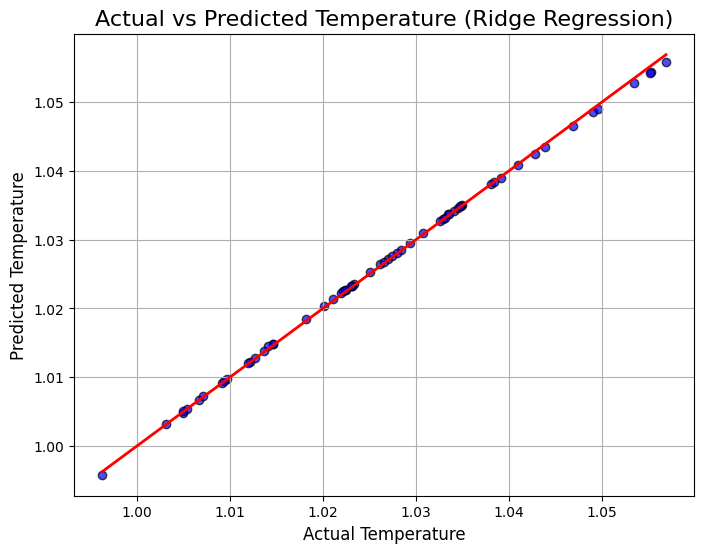

In [137]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.title('Actual vs Predicted Temperature (Ridge Regression)', fontsize=16)
plt.xlabel('Actual Temperature', fontsize=12)
plt.ylabel('Predicted Temperature', fontsize=12)
plt.grid(True)
plt.show()